In [ ]:
from google.colab import files
uploaded = files.upload()

Saving churn_data.csv to churn_data (1).csv
Saving customer_data.csv to customer_data (1).csv
Saving internet_data.csv to internet_data (1).csv


In [ ]:
import pandas as pd

# (1) Importing and Reading the data sets
churn_data = pd.read_csv("churn_data.csv")
customer_data = pd.read_csv('customer_data.csv')
internet_data = pd.read_csv ('internet_data.csv')

In [ ]:
# Merging the datasets

merged_df = pd.merge(churn_data, customer_data, on='customerID')
merged_df1 = pd.merge(merged_df, internet_data, on='customerID')

In [ ]:
# visualizing column names
merged_df1.columns



Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [ ]:
# (2) EDA
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [ ]:
print(merged_df1.shape)
print(merged_df1.head())
print(merged_df1.describe())
print(merged_df1.isnull().sum())
print(merged_df1.corr())

(7043, 21)
   customerID  tenure PhoneService        Contract PaperlessBilling  \
0  7590-VHVEG       1           No  Month-to-month              Yes   
1  5575-GNVDE      34          Yes        One year               No   
2  3668-QPYBK       2          Yes  Month-to-month              Yes   
3  7795-CFOCW      45           No        One year               No   
4  9237-HQITU       2          Yes  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges Churn  gender  ...  \
0           Electronic check           29.85        29.85    No  Female  ...   
1               Mailed check           56.95       1889.5    No    Male  ...   
2               Mailed check           53.85       108.15   Yes    Male  ...   
3  Bank transfer (automatic)           42.30      1840.75    No    Male  ...   
4           Electronic check           70.70       151.65   Yes  Female  ...   

   Partner Dependents     MultipleLines InternetService OnlineSecurity  \
0      

<ipython-input-68-d287b8996e96>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(merged_df1.corr())


In [ ]:
print(merged_df1['TotalCharges'])

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object


In [ ]:
# Transforming the column TotalCharges into a numeric data type because it has wrongly detected as "object"
merged_df1['TotalCharges'] = pd.to_numeric(merged_df1['TotalCharges'], errors='coerce') # "coerce" used to replace the all the non numeric data with NaN
print(merged_df1['TotalCharges'])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64


In [ ]:
# null observations of the TotalCharges column
merged_df1['TotalCharges'].isnull().sum()

11

In [ ]:
# Droping observations with null values
merged_df1['MonthlyCharges'].isnull().sum()
# Here no null values exist in the "MonthlyCharges" so we can remove those observation from the dataset.
# Droping observations with null values
merged_df1.dropna(inplace=True)
print(merged_df1)

      customerID  tenure PhoneService        Contract PaperlessBilling  \
0     7590-VHVEG       1           No  Month-to-month              Yes   
1     5575-GNVDE      34          Yes        One year               No   
2     3668-QPYBK       2          Yes  Month-to-month              Yes   
3     7795-CFOCW      45           No        One year               No   
4     9237-HQITU       2          Yes  Month-to-month              Yes   
...          ...     ...          ...             ...              ...   
7038  6840-RESVB      24          Yes        One year              Yes   
7039  2234-XADUH      72          Yes        One year              Yes   
7040  4801-JZAZL      11           No  Month-to-month              Yes   
7041  8361-LTMKD       4          Yes  Month-to-month              Yes   
7042  3186-AJIEK      66          Yes        Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  gender  \
0              Electronic check 

In [ ]:
# Droping the customerID column from the dataset as it is useless in the further calculations.
merged_df1.drop(columns='customerID', inplace=True)
print(merged_df1)

      tenure PhoneService        Contract PaperlessBilling  \
0          1           No  Month-to-month              Yes   
1         34          Yes        One year               No   
2          2          Yes  Month-to-month              Yes   
3         45           No        One year               No   
4          2          Yes  Month-to-month              Yes   
...      ...          ...             ...              ...   
7038      24          Yes        One year              Yes   
7039      72          Yes        One year              Yes   
7040      11           No  Month-to-month              Yes   
7041       4          Yes  Month-to-month              Yes   
7042      66          Yes        Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  gender  \
0              Electronic check           29.85         29.85    No  Female   
1                  Mailed check           56.95       1889.50    No    Male   
2                 

In [ ]:
 print(merged_df1)

      tenure PhoneService        Contract PaperlessBilling  \
0          1           No  Month-to-month              Yes   
1         34          Yes        One year               No   
2          2          Yes  Month-to-month              Yes   
3         45           No        One year               No   
4          2          Yes  Month-to-month              Yes   
...      ...          ...             ...              ...   
7038      24          Yes        One year              Yes   
7039      72          Yes        One year              Yes   
7040      11           No  Month-to-month              Yes   
7041       4          Yes  Month-to-month              Yes   
7042      66          Yes        Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  gender  \
0              Electronic check           29.85         29.85    No  Female   
1                  Mailed check           56.95       1889.50    No    Male   
2                 

In [ ]:
# unique elements of the PaymentMethod column
merged_df1.PaymentMethod.unique()


array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
# "PaymentMethod" contain the word "automatic". These are too long to be used as tick labels so, we shall remove them.
merged_df1['PaymentMethod'] = merged_df1['PaymentMethod'].str.replace(' (automatic)', '', regex=False)
print(merged_df1['PaymentMethod'])
merged_df1.PaymentMethod.unique()

0       Electronic check
1           Mailed check
2           Mailed check
3          Bank transfer
4       Electronic check
              ...       
7038        Mailed check
7039         Credit card
7040    Electronic check
7041        Mailed check
7042       Bank transfer
Name: PaymentMethod, Length: 7032, dtype: object


array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

In [ ]:
#(3) Data Visualization
import matplotlib.pyplot as plt
prop_response = merged_df1['Churn'].value_counts(normalize=True)
print(prop_response)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64


Text(0, 0.5, 'proportion of observations')

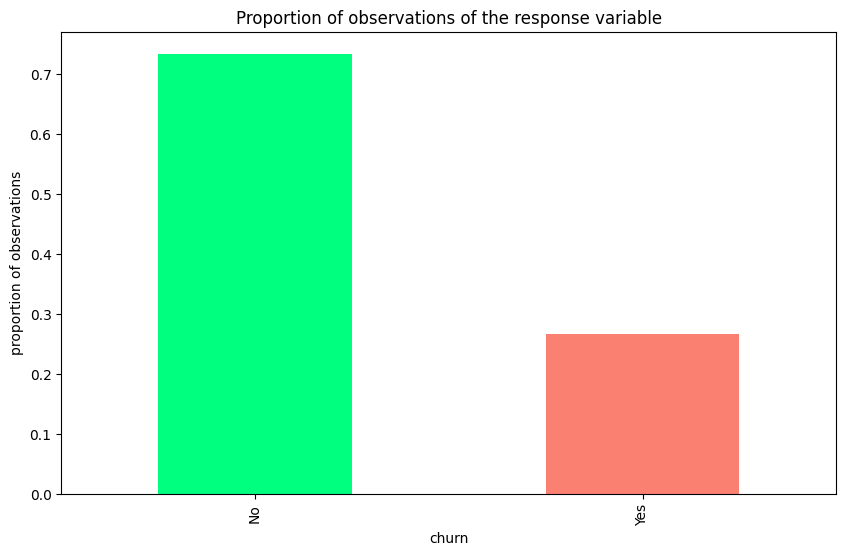

In [ ]:
# Plotting the bar graph
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()
prop_response.plot(kind='bar', ax=ax, color=['springgreen','salmon'])
ax.set_title('Proportion of observations of the response variable')
ax.set_xlabel('churn')
ax.set_ylabel('proportion of observations')

<Axes: xlabel='gender', ylabel='count'>

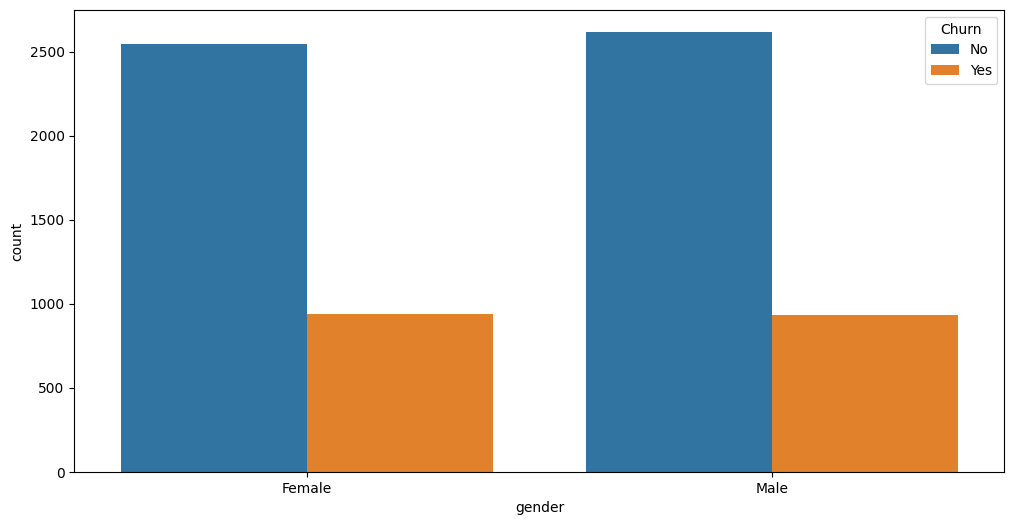

In [ ]:
# Bar graph plotting
# Distribution of gender based on churn status
import seaborn as sns
plt.figure(figsize = (12,6))
sns.countplot(x = 'gender', hue = 'Churn', data = merged_df1)


In [ ]:
print(merged_df1['SeniorCitizen'].unique())
SC = merged_df1['SeniorCitizen'].value_counts(normalize=True)
print(SC)

[0 1]
0    0.8376
1    0.1624
Name: SeniorCitizen, dtype: float64


Text(0, 0.5, 'proportion of observations')

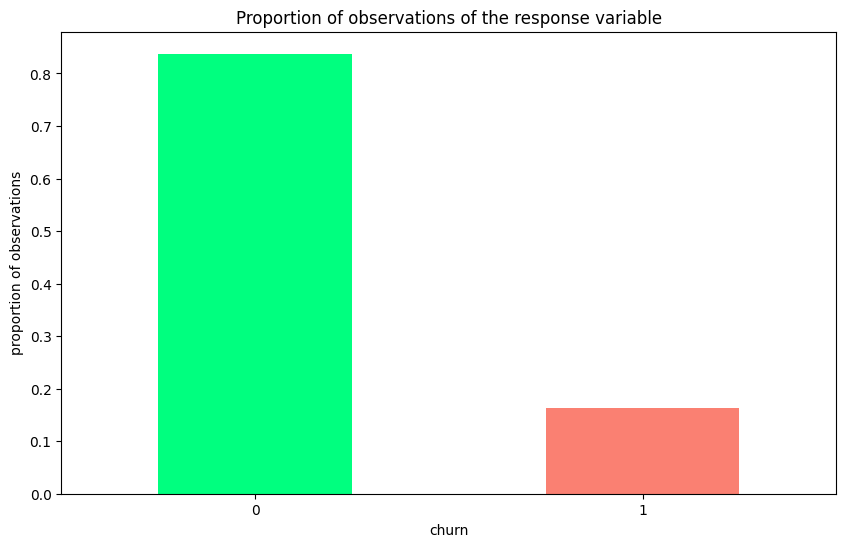

In [ ]:
# Plotting the bar graph
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()
SC.plot(kind='bar', ax=ax, rot = 0, color=['springgreen','salmon'])
ax.set_title('Proportion of observations of the response variable')
ax.set_xlabel('churn')
ax.set_ylabel('proportion of observations')

<Axes: xlabel='InternetService', ylabel='count'>

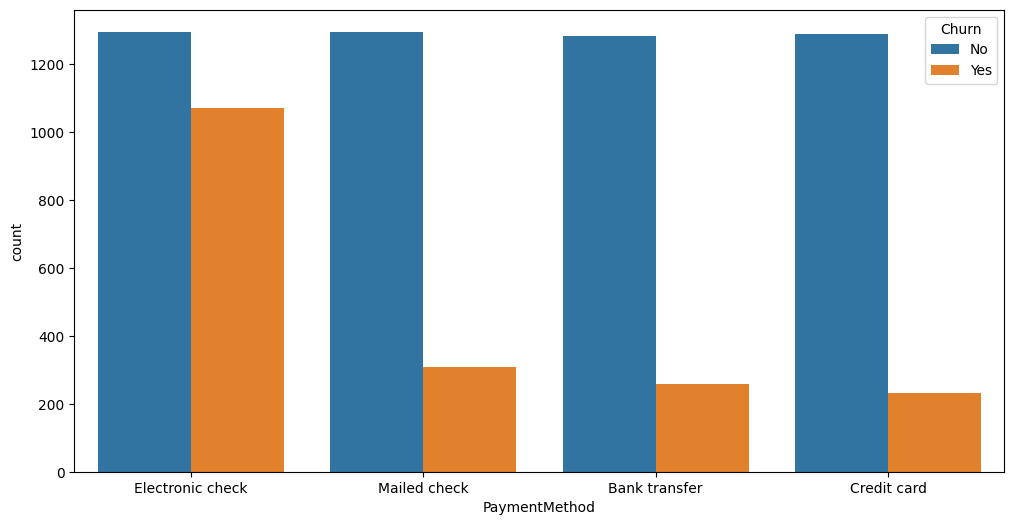

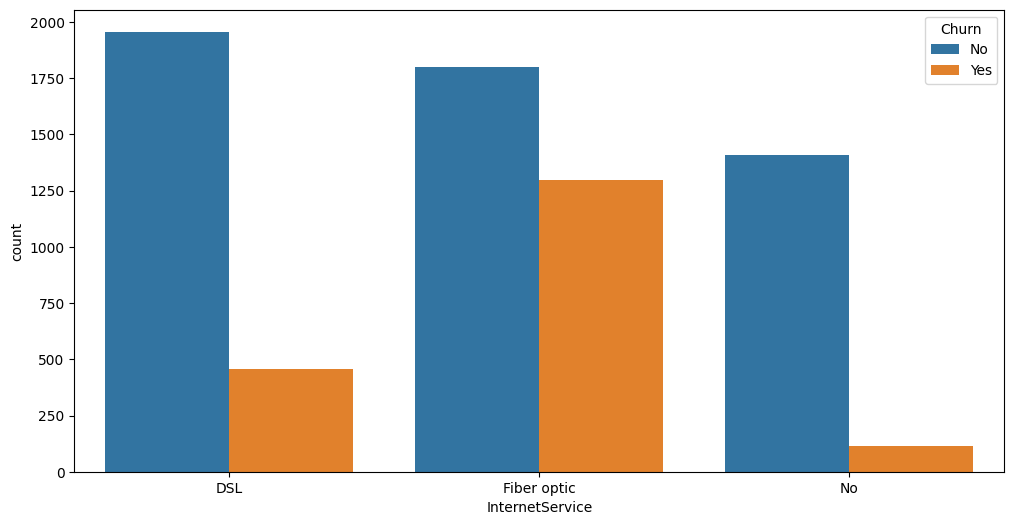

In [ ]:
# Distribution of payment method based on churn status
plt.figure(figsize = (12,6))
sns.countplot(x = 'PaymentMethod', hue = 'Churn', data = merged_df1)

# Distribution of internet service based on churn status
plt.figure(figsize = (12,6))
sns.countplot(x = 'InternetService', hue = 'Churn', data = merged_df1)


# If we observe the churn rate in both the graphs people having electronic check methods and having fiber optic as internet services
# are highly likely to churn compared with other sets of people.



<Axes: xlabel='gender', ylabel='count'>

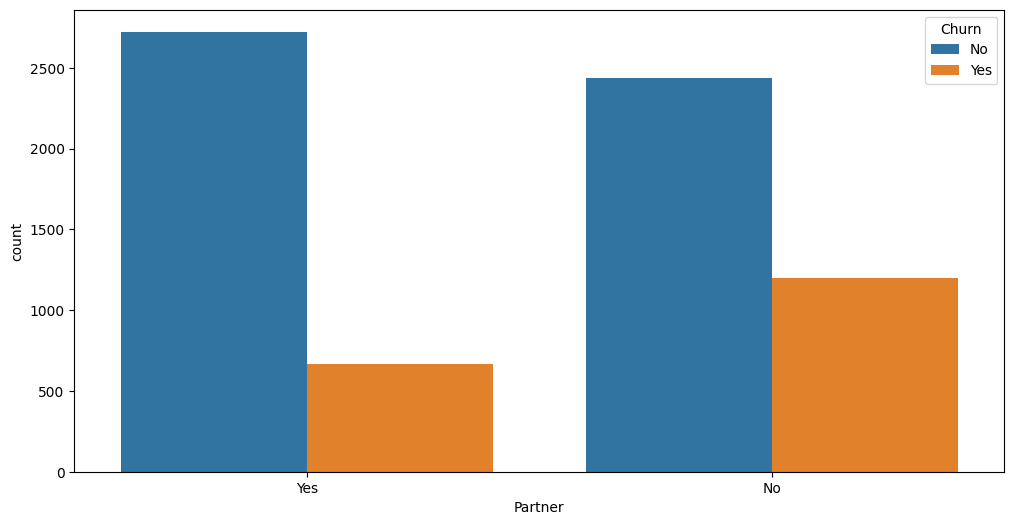

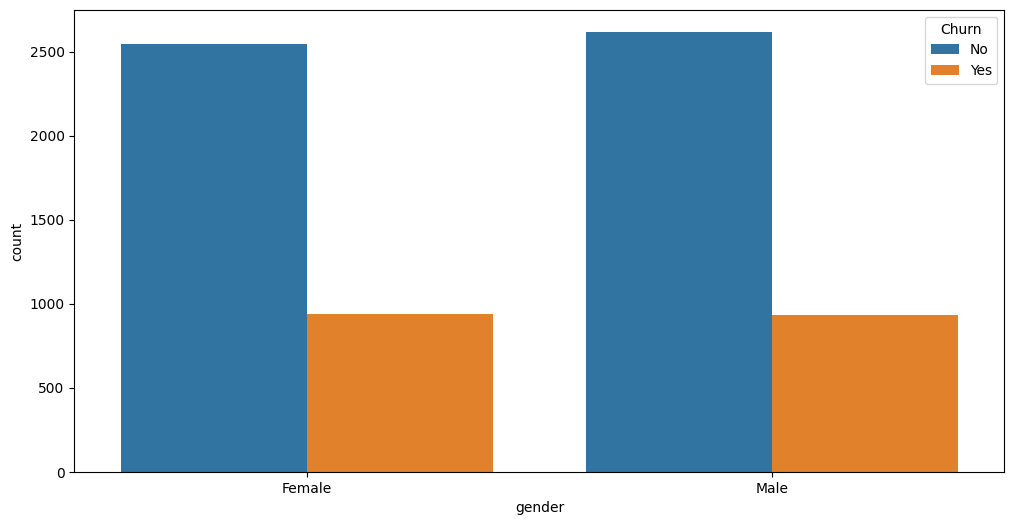

In [ ]:
# Distribution of Partener based on churn status
plt.figure(figsize = (12,6))
sns.countplot(x = 'Partner', hue = 'Churn', data = merged_df1)

# Distribution of Gender based on churn status
plt.figure(figsize = (12,6))
sns.countplot(x = 'gender', hue = 'Churn', data = merged_df1)


# Customers with a partner churn less than customers with no partner.
# In the gender plot whether it is male of female churning rate is same.

<Axes: xlabel='Churn', ylabel='tenure'>

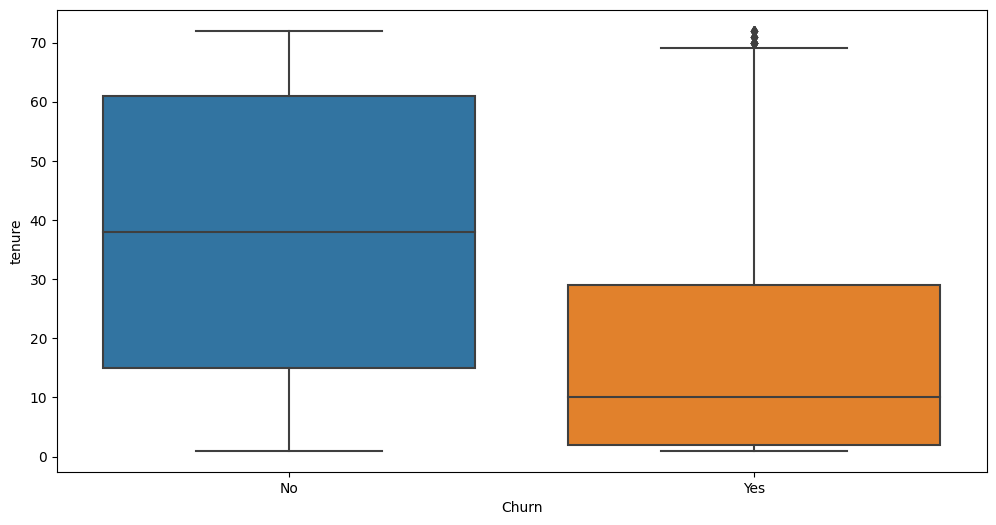

In [ ]:
# Box plot
# Distribution of tenure based on churn status
plt.figure(figsize = (12,6))
sns.boxplot(x = 'Churn', y ='tenure', data = merged_df1)

# we can see that people with low tenure are likely to churn compared with people with higher tenure.

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

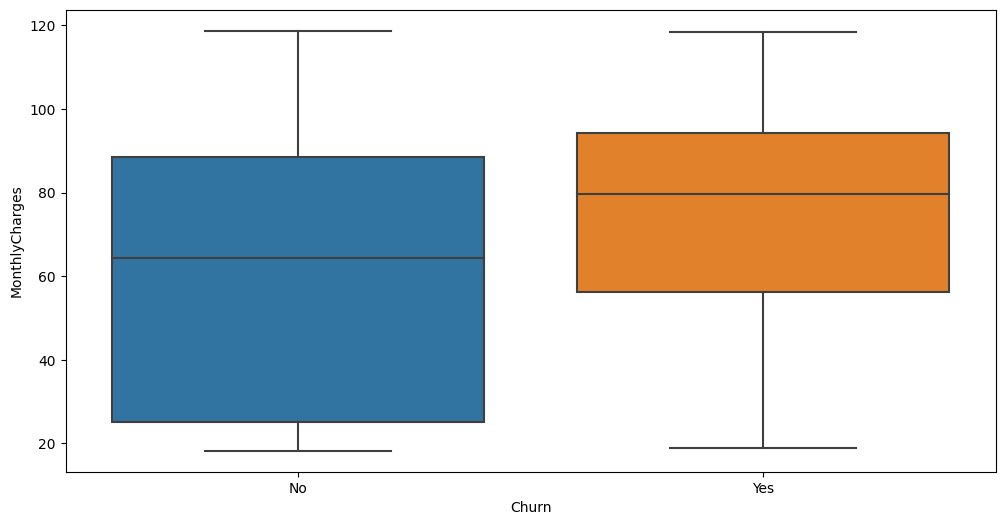

In [ ]:
# Distribution of monthly charges based on churn status
plt.figure(figsize = (12,6))
sns.boxplot(x = 'Churn', y ='MonthlyCharges', data = merged_df1)

# we can see that people who churned are more likely to have higher monthly charges.

<Axes: xlabel='PaymentMethod', ylabel='count'>

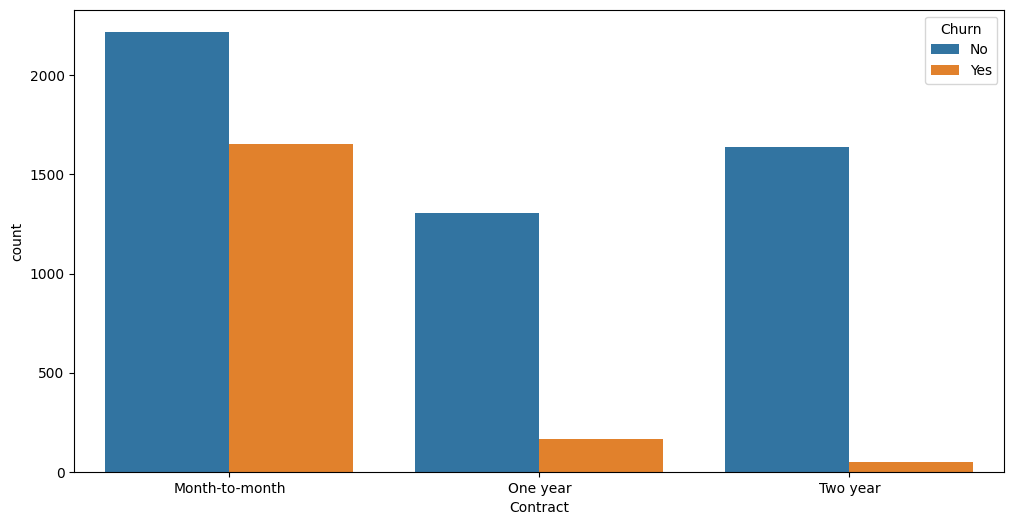

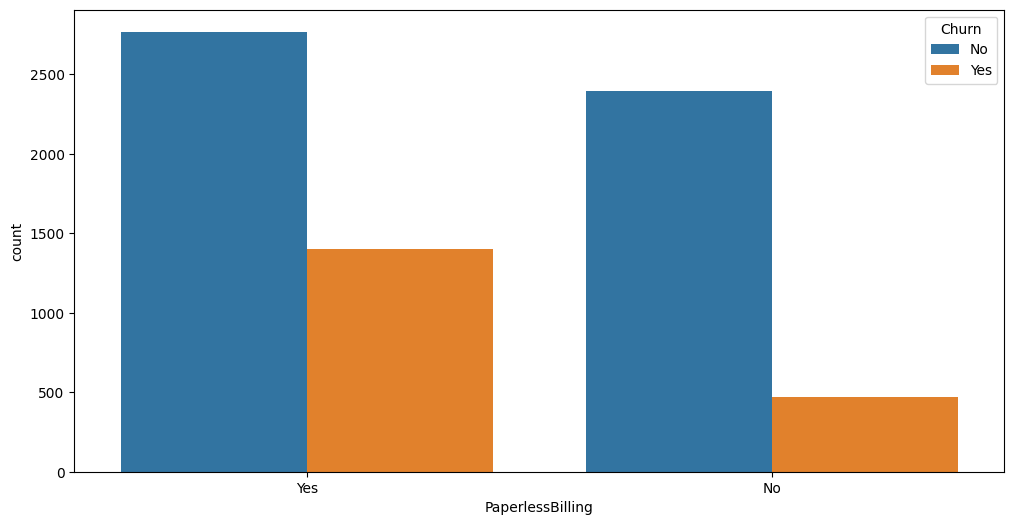

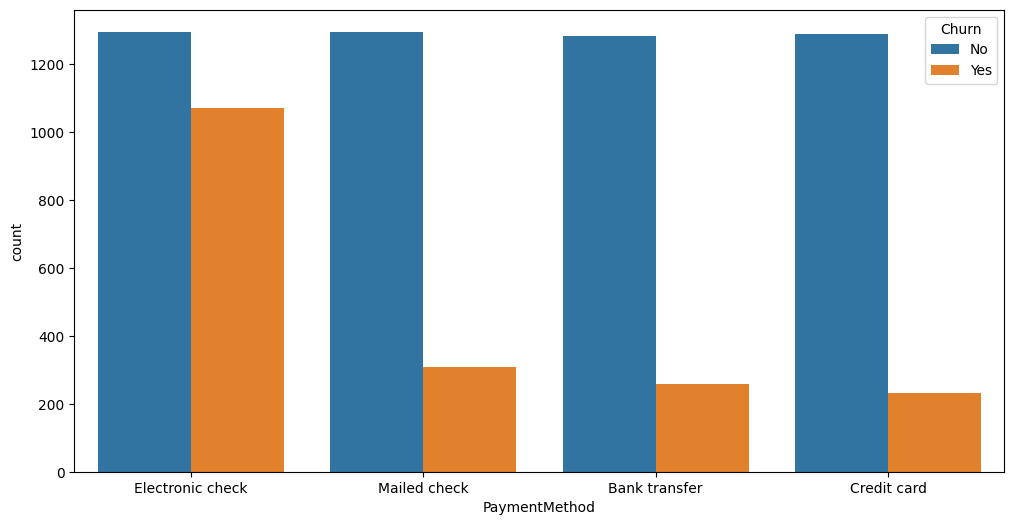

In [ ]:
# Customer Account Information — Categorical variables

# Distribution of Contract based on churn status
plt.figure(figsize = (12,6))
sns.countplot(x = 'Contract', hue = 'Churn', data = merged_df1)

# Distribution of PaperlessBilling based on churn status
plt.figure(figsize = (12,6))
sns.countplot(x = 'PaperlessBilling', hue = 'Churn', data = merged_df1)

# Distribution of PaymentMethod based on churn status
plt.figure(figsize = (12,6))
sns.countplot(x = 'PaymentMethod', hue = 'Churn', data = merged_df1)


# Customers with month-to-month contracts have higher churn rates compared to clients with yearly contracts.
# Customers who opted for an electronic check as paying method are more likely to leave the company.
# Customers who opted to paperless billing churn more than those who are not opted.


In [ ]:
unique_values = pd.DataFrame(columns=['Column', 'Unique_Values'])
for column in merged_df1.select_dtypes(include='object'):
    unique_values = unique_values.append({'Column': column, 'Unique_Values': merged_df1[column].unique()}, ignore_index=True)

print(unique_values)

              Column                                      Unique_Values
0       PhoneService                                          [No, Yes]
1           Contract               [Month-to-month, One year, Two year]
2   PaperlessBilling                                          [Yes, No]
3      PaymentMethod  [Electronic check, Mailed check, Bank transfer...
4              Churn                                          [No, Yes]
5             gender                                     [Female, Male]
6            Partner                                          [Yes, No]
7         Dependents                                          [No, Yes]
8      MultipleLines                        [No phone service, No, Yes]
9    InternetService                             [DSL, Fiber optic, No]
10    OnlineSecurity                     [No, Yes, No internet service]
11      OnlineBackup                     [Yes, No, No internet service]
12  DeviceProtection                     [No, Yes, No internet s

<ipython-input-87-3c211a7b5773>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unique_values = unique_values.append({'Column': column, 'Unique_Values': merged_df1[column].unique()}, ignore_index=True)
<ipython-input-87-3c211a7b5773>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unique_values = unique_values.append({'Column': column, 'Unique_Values': merged_df1[column].unique()}, ignore_index=True)
<ipython-input-87-3c211a7b5773>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unique_values = unique_values.append({'Column': column, 'Unique_Values': merged_df1[column].unique()}, ignore_index=True)
<ipython-input-87-3c211a7b5773>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

In [ ]:
merged_df1['OnlineSecurity'].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

In [ ]:
merged_df1['OnlineBackup'].value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

In [ ]:
merged_df1['DeviceProtection'].value_counts()

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

In [ ]:
merged_df1['TechSupport'].value_counts()

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

In [ ]:
merged_df1['StreamingTV'].value_counts()

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

In [ ]:
merged_df1['StreamingMovies'].value_counts()

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64

In [ ]:
merged_df1['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [ ]:
abc = merged_df1.loc [merged_df1['InternetService'] == 'No']
abc

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
11,16,Yes,Two year,No,Credit card,18.95,326.80,No,Male,0,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
16,52,Yes,One year,No,Mailed check,20.65,1022.95,No,Female,0,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
21,12,Yes,One year,No,Bank transfer,19.80,202.25,No,Male,0,Yes,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
22,1,Yes,Month-to-month,No,Mailed check,20.15,20.15,Yes,Male,0,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
33,1,Yes,Month-to-month,No,Bank transfer,20.20,20.20,No,Male,0,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,51,Yes,Two year,No,Bank transfer,20.65,1020.75,No,Female,0,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7019,39,Yes,Two year,No,Mailed check,20.15,826.00,No,Female,0,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7020,12,Yes,Month-to-month,Yes,Electronic check,19.20,239.00,No,Male,0,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7030,2,Yes,Month-to-month,Yes,Mailed check,20.05,39.25,No,Female,0,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service


In [ ]:
abc['OnlineSecurity'].value_counts()

No internet service    1520
Name: OnlineSecurity, dtype: int64

In [ ]:
abc['OnlineBackup'].value_counts()

No internet service    1520
Name: OnlineBackup, dtype: int64

In [ ]:
abc['DeviceProtection'].value_counts()

No internet service    1520
Name: DeviceProtection, dtype: int64

In [ ]:
abc['TechSupport'].value_counts()

No internet service    1520
Name: TechSupport, dtype: int64

In [ ]:
abc['StreamingTV'].value_counts()

No internet service    1520
Name: StreamingTV, dtype: int64

In [ ]:
abc['StreamingMovies'].value_counts()

No internet service    1520
Name: StreamingMovies, dtype: int64

In [ ]:
abc['InternetService'].value_counts()

No    1520
Name: InternetService, dtype: int64

In [ ]:
merged_df1['MultipleLines'].value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [ ]:
merged_df1['PhoneService'].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [ ]:
merged_df1['OnlineSecurity'] = merged_df1['OnlineSecurity'].replace({'No internet service' : 'No'})
merged_df1['OnlineBackup'] = merged_df1['OnlineBackup'].replace({'No internet service' : 'No'})
merged_df1['DeviceProtection'] = merged_df1['DeviceProtection'].replace({'No internet service' : 'No'})
merged_df1['TechSupport'] = merged_df1['TechSupport'].replace({'No internet service' : 'No'})
merged_df1['StreamingTV'] = merged_df1['StreamingTV'].replace({'No internet service' : 'No'})
merged_df1['StreamingMovies'] = merged_df1['StreamingMovies'].replace({'No internet service' : 'No'})
merged_df1['MultipleLines'] = merged_df1['MultipleLines'].replace({'No phone service' : 'No'})

In [ ]:
print(merged_df1['OnlineSecurity'].unique())
print(merged_df1['OnlineBackup'].unique())
print(merged_df1['DeviceProtection'].unique())
print(merged_df1['TechSupport'].unique())
print(merged_df1['StreamingTV'].unique())
print(merged_df1['StreamingMovies'].unique())
print(merged_df1['MultipleLines'].unique())

['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']


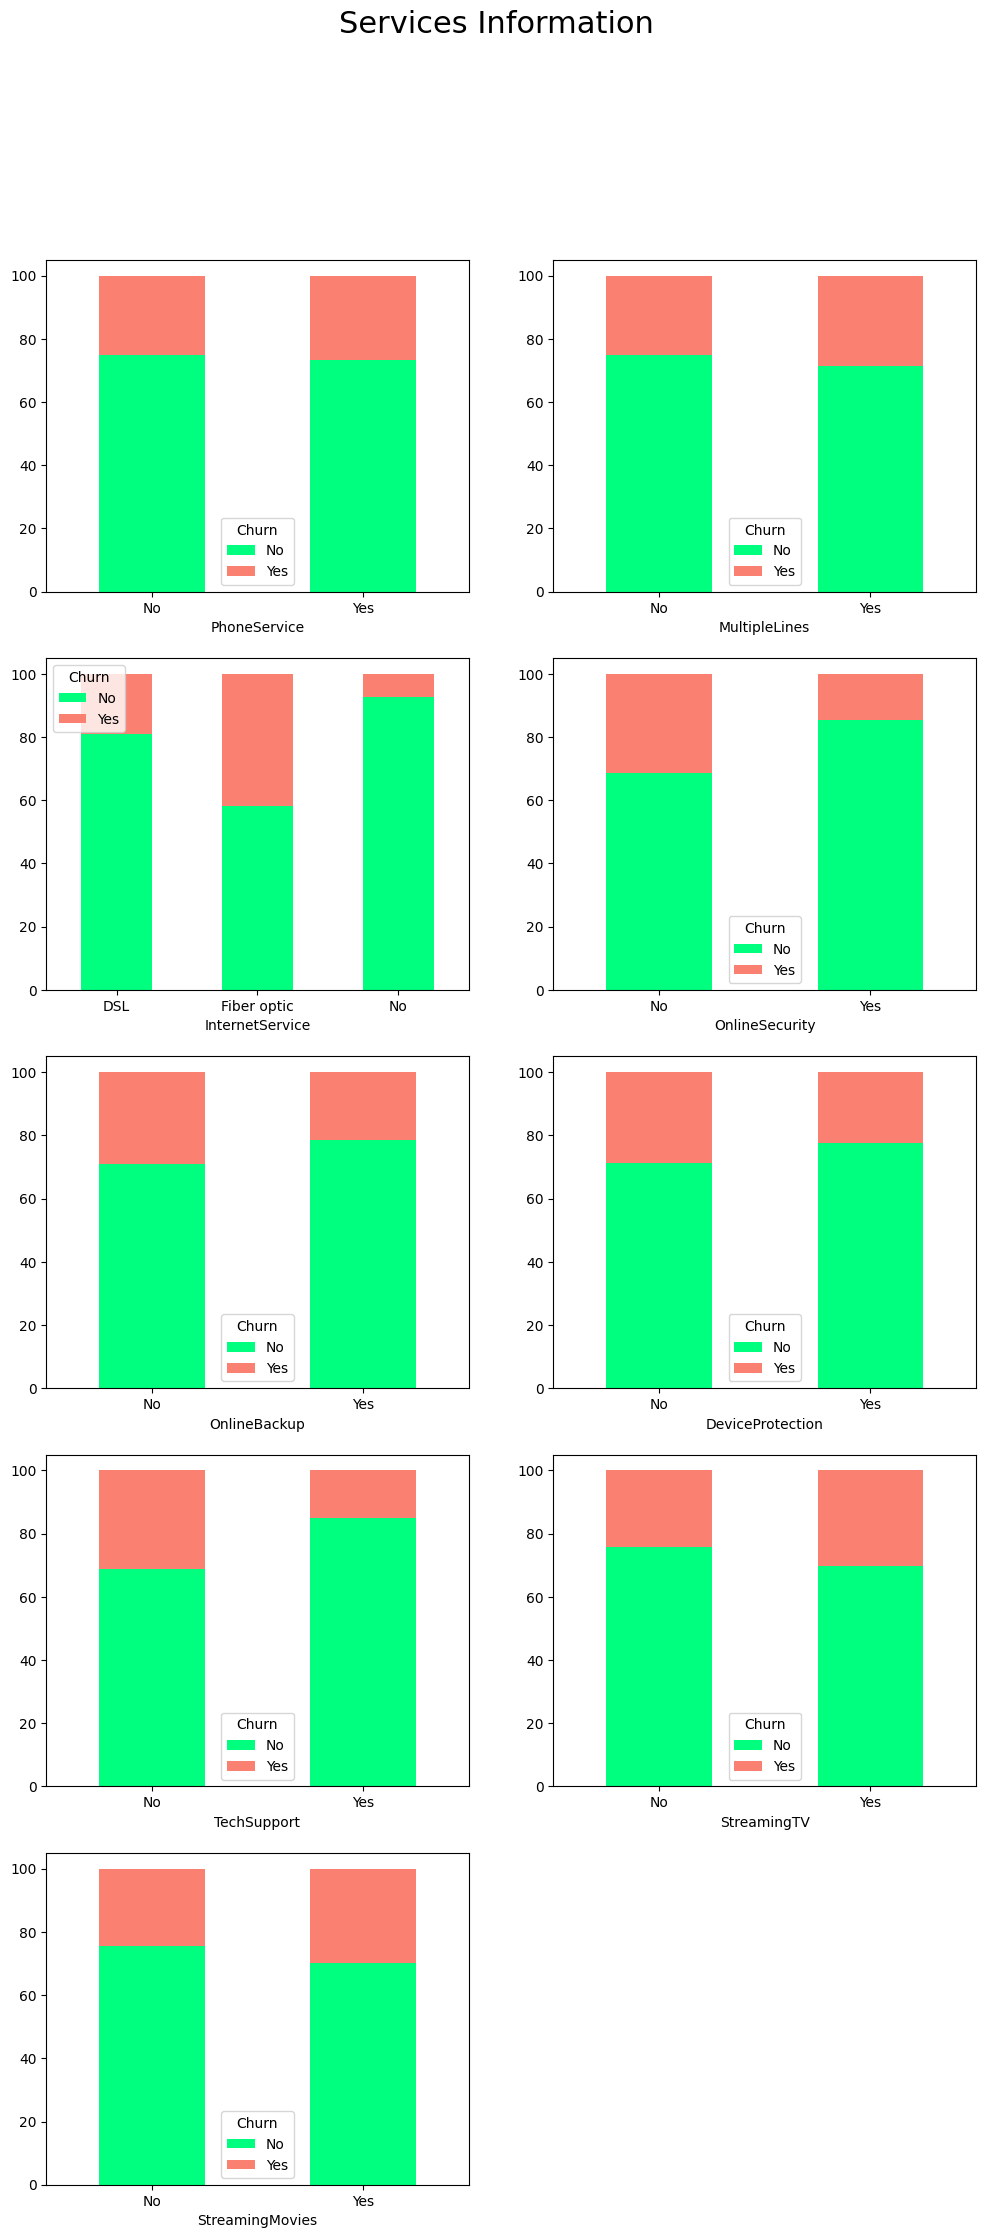

In [ ]:
def percentage_stacked_plot(columns_to_plot, plotting_title):
    import math
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)


    fig = plt.figure(figsize=(12, 5 * number_of_rows))
    fig.suptitle(plotting_title, fontsize=22)

    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):   # "enumerate" to keep track of the number of iterations (loops) in a loop

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        props = pd.crosstab(merged_df1[column], merged_df1['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

        props.plot(kind='bar', ax=ax, stacked=True,
                                 rot = 0, color=['springgreen','salmon'])


services_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# stacked plot of services columns
percentage_stacked_plot(services_columns, 'Services Information')


# PhoneService and MultipleLines to have significant predictive power.
# The percentage of churn for all classes in both independent variables is nearly the same.
# Customers with online security churn less than those without it.
# Customers with no tech support tend to churn more often than those with tech support.

In [ ]:
# Heat Map

# Calculating the correlation matrix
correlation_matrix = merged_df1.apply(lambda x: pd.factorize(x)[0]).corr()

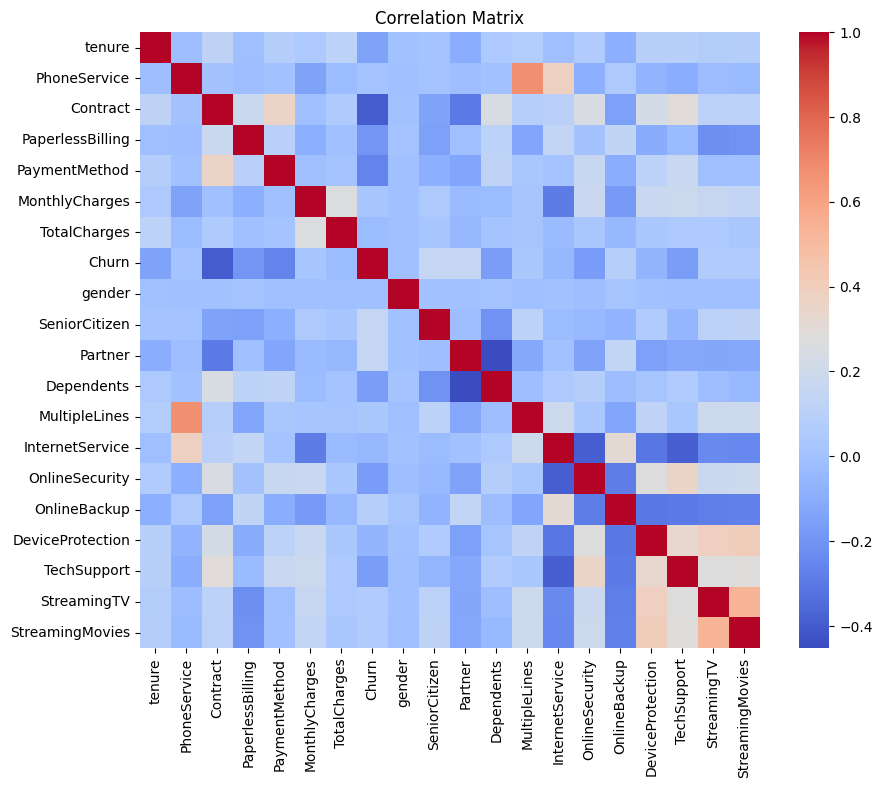

In [ ]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# (4) Feature importance

# We are interested in evaluating the degree of dependency between each independent variable and the response variable.
# Higher values of mutual information show a higher degree of dependency which indicates that the independent variable will be useful for predicting the target.

# Computing mutual information
from sklearn import metrics

def compute_mutual_information(categorical_serie):
    return metrics.mutual_info_score(categorical_serie, merged_df1.Churn)

categorical_variables = merged_df1.select_dtypes(include=object).drop('Churn', axis=1)
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

print(feature_importance)



# As we can see that MultipleLines, PhoneService, gender are closely to zero, so these three features
# have not the strong relationship with the target variable. so that if we want to drop these three features we can.

Contract            0.098182
InternetService     0.055394
PaymentMethod       0.044423
PaperlessBilling    0.019119
OnlineSecurity      0.015891
TechSupport         0.014614
Dependents          0.014270
Partner             0.011383
OnlineBackup        0.003464
DeviceProtection    0.002230
StreamingTV         0.001983
StreamingMovies     0.001837
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


In [ ]:
# (5) Feature Engineering

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

merged_df1["Churn"] = LE.fit_transform(merged_df1["Churn"])
merged_df1["Partner"] = LE.fit_transform(merged_df1["Partner"])
merged_df1["Dependents"] = LE.fit_transform(merged_df1["Dependents"])
merged_df1["PaperlessBilling"] = LE.fit_transform(merged_df1["PaperlessBilling"])
merged_df1["gender"] = LE.fit_transform(merged_df1["gender"])
merged_df1["PhoneService"] = LE.fit_transform(merged_df1["PhoneService"])
merged_df1["MultipleLines"] = LE.fit_transform(merged_df1["MultipleLines"])

merged_df1.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,0,1,0,0,DSL,No,Yes,No,No,No,No
1,34,1,One year,0,Mailed check,56.95,1889.50,0,1,0,0,0,0,DSL,Yes,No,Yes,No,No,No
2,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0,0,0,DSL,Yes,Yes,No,No,No,No
3,45,0,One year,0,Bank transfer,42.30,1840.75,0,1,0,0,0,0,DSL,Yes,No,Yes,Yes,No,No
4,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,0,0,0,Fiber optic,No,No,No,No,No,No


In [ ]:
# One Hot Encoding
one_hot_encoded_data = pd.get_dummies(merged_df1, columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                                                             'StreamingMovies', 'Contract', 'PaymentMethod','InternetService'])
print(one_hot_encoded_data)

In [ ]:
one_hot_encoded_data.columns

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'MultipleLines', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer',
       'PaymentMethod_Credit card', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No'],
      dtype='object')

In [ ]:
# Data normalization transforms multiscaled data to the same scale. After normalization, all variables have a
# similar influence on the model.

min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# scale numerical variables using min max scaler
for column in min_max_columns:
        # minimum value of the column
        min_column = one_hot_encoded_data[column].min()
        # maximum value of the column
        max_column = one_hot_encoded_data[column].max()
        # min max scaler
        one_hot_encoded_data[column] = (one_hot_encoded_data[column] - min_column) / (max_column - min_column)


print(one_hot_encoded_data.tenure)
print(one_hot_encoded_data.MonthlyCharges)
print(one_hot_encoded_data.TotalCharges)

0       0.000000
1       0.464789
2       0.014085
3       0.619718
4       0.014085
          ...   
7038    0.323944
7039    1.000000
7040    0.140845
7041    0.042254
7042    0.915493
Name: tenure, Length: 7032, dtype: float64
0       0.115423
1       0.385075
2       0.354229
3       0.239303
4       0.521891
          ...   
7038    0.662189
7039    0.845274
7040    0.112935
7041    0.558706
7042    0.869652
Name: MonthlyCharges, Length: 7032, dtype: float64
0       0.001275
1       0.215867
2       0.010310
3       0.210241
4       0.015330
          ...   
7038    0.227521
7039    0.847461
7040    0.037809
7041    0.033210
7042    0.787641
Name: TotalCharges, Length: 7032, dtype: float64


In [ ]:
# (6) Setting a baseline
# In machine learning, we often use a simple classifier called baseline to evaluate the performance of a model.
# In this classification problem, the rate of customers that did not churn can be used as a baseline to evaluate the quality of the models generated.
# These models should perform the baseline capabilities to be considered for future predictions.


In [ ]:
# (7) Splitting the data in training and testing sets

X = one_hot_encoded_data.drop(columns='Churn')
Y = one_hot_encoded_data.loc[:, 'Churn']
print(X.columns)
print(Y.name)
one_hot_encoded_data


Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'MultipleLines', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer',
       'PaymentMethod_Credit card', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No'],
      dtype='object')
Churn


,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0.000000,0,1,0.115423,0.001275,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,0.464789,1,0,0.385075,0.215867,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0.014085,1,1,0.354229,0.010310,1,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
3,0.619718,0,0,0.239303,0.210241,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
4,0.014085,1,1,0.521891,0.015330,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.323944,1,1,0.662189,0.227521,0,1,0,1,1,...,0,1,0,0,0,0,1,1,0,0
7039,1.000000,1,1,0.845274,0.847461,0,0,0,1,1,...,0,1,0,0,1,0,0,0,1,0
7040,0.140845,0,1,0.112935,0.037809,0,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
7041,0.042254,1,1,0.558706,0.033210,1,1,1,1,0,...,1,0,0,0,0,0,1,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
splitting = train_test_split(X, Y, test_size=0.25,random_state=42, shuffle=True)

X_train, X_test, Y_train, Y_test = splitting

splitting = train_test_split(X, Y, test_size=0.25, random_state=42, shuffle=True)

X_train_cat, X_test_cat, Y_train_cat, Y_test_cat = splitting

In [ ]:
%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE # Synthetic Minority Over-sampling Technique

smote = SMOTE(random_state=42)

X_train, Y_train = smote.fit_resample(X_train, Y_train)

X_train_cat, Y_train_cat = smote.fit_resample(X_train_cat, Y_train_cat)

In [ ]:
# (1) Gradient Boosting
# Hyperparameter Tuning
# parameter grid
grid_parameters = {'n_estimators': [80, 90, 100, 110, 115, 120],
                   'max_depth': [3, 4, 5, 6],
                   'max_features': [None, 'auto', 'sqrt', 'log2'],
                   'min_samples_split': [2, 3, 4, 5]}


# defining the RandomizedSearchCV class for trying different parameter combinations
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1,
                                   error_score='raise')

# n_iter:- Number of parameter settings that are sampled.
# n_jobs:- Number of jobs to run in parallel, -1 means using all processors.
# cv:- Determines the cross-validation splitting strategy, to use the default 5-fold cross validation.
# param_distributions:- Lists of parameters to try.

# fitting the model for random search
random_search.fit(X_train, Y_train)

# printing best parameter after tuning
print(random_search.best_params_)

{'n_estimators': 120, 'min_samples_split': 4, 'max_features': 'sqrt', 'max_depth': 6}


In [ ]:
# Now that the model is trained, it is time to evaluate its performance using the testing set.

# making the predictions
random_search_predictions = random_search.predict(X_test)

# construct the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, random_search_predictions)
confusion_matrix


array([[1043,  257],
       [ 155,  303]])

In [ ]:
# printing classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, random_search_predictions))


              precision    recall  f1-score   support

           0       0.87      0.80      0.84      1300
           1       0.54      0.66      0.60       458

    accuracy                           0.77      1758
   macro avg       0.71      0.73      0.72      1758
weighted avg       0.78      0.77      0.77      1758



In [ ]:
# The previous summary does not contain the accuracy of the classification. However,
# this can be easily calculated using the function "accuracy_score".

# accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, random_search_predictions)

0.7656427758816837

In [ ]:
# (2) ANN
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=50
                     ,max_iter=5000
                     ,solver='sgd'
                     ,activation='relu'
                     ,random_state=1
                     ,verbose=True
                     ,tol=0.0001,
                     learning_rate='constant',
                     learning_rate_init=0.001)

In [ ]:
model.fit(X_train, Y_train)

In [ ]:
#for predicting the classes
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

#for predicting the probabilites
y_train_predict_prob = model.predict_proba(X_train)
y_test_predict_prob = model.predict_proba(X_test)

In [ ]:
y_test_predict_prob = model.predict_proba(X_test)

In [ ]:
from sklearn import metrics
# Checking the accuracy on the Testing data
print(metrics.confusion_matrix(Y_test,y_test_predict))

[[1008  292]
 [ 142  316]]


In [ ]:
from sklearn.metrics import classification_report
print(metrics.classification_report(Y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82      1300
           1       0.52      0.69      0.59       458

    accuracy                           0.75      1758
   macro avg       0.70      0.73      0.71      1758
weighted avg       0.78      0.75      0.76      1758



In [ ]:
# accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_test_predict)

0.7531285551763367

In [ ]:
# (3) Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
accuracy_score(Y_test, y_pred)

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1300
           1       0.55      0.72      0.62       458

    accuracy                           0.78      1758
   macro avg       0.72      0.76      0.73      1758
weighted avg       0.80      0.78      0.78      1758



0.7753128555176336

In [ ]:
Pred_Prob = model.predict_proba(X_test)
Pred_Prob
Pred_Prob = model.predict_proba(X_test)[:,1]
Pred_Prob

array([0.00801909, 0.30782779, 0.79022439, ..., 0.43035869, 0.71940613,
       0.02963688])

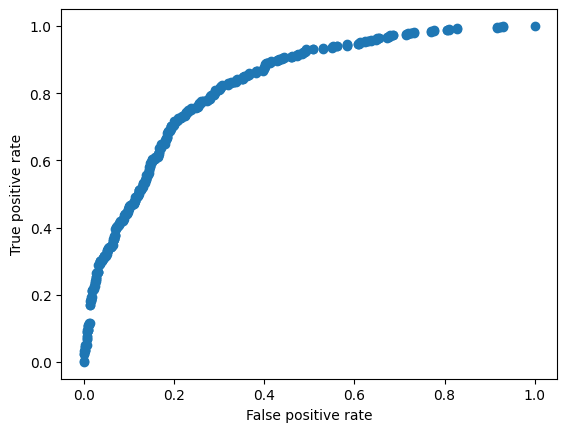

Area under curve: 0.827


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
FPR, TPR, _ = roc_curve(Y_test, Pred_Prob)

import matplotlib.pyplot as plt
plt.scatter(FPR,TPR)
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()

auc = roc_auc_score(Y_test, Pred_Prob)
print("Area under curve:",auc.round(3))

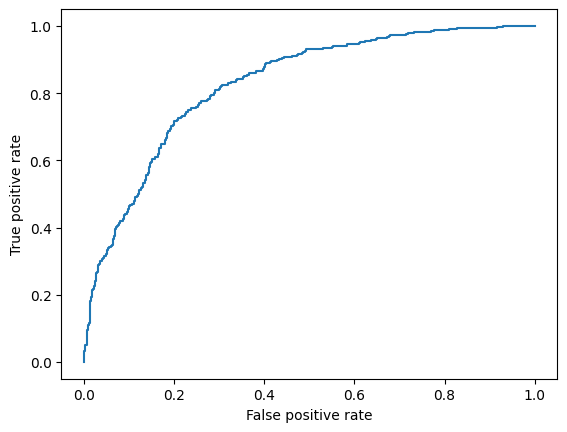

Area under curve: 0.827


In [ ]:
#---------------------OR------------------------
plt.plot(FPR,TPR)
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()

auc = roc_auc_score(Y_test, Pred_Prob)
print("Area under curve:",auc.round(3))

In [ ]:
# (4) Decision Tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'gini', random_state=1)
model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1300
           1       0.46      0.53      0.49       458

    accuracy                           0.71      1758
   macro avg       0.64      0.66      0.65      1758
weighted avg       0.73      0.71      0.72      1758



In [ ]:
# accuracy of the model
accuracy_score(Y_test, y_pred)

0.7127417519908987

In [ ]:
# (5) Random Forest
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=1000,random_state=1)
RFC.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=1000, random_state=1)

In [ ]:
print(RFC.score(X_train, Y_train))
print(RFC.score(X_test, Y_test))

0.9988351022521357
0.7616609783845278


In [ ]:
RFC1 = RandomForestClassifier(n_estimators=100,random_state=1)
RFC1.fit(X_train,Y_train)
print(RFC1.score(X_train, Y_train))
print(RFC1.score(X_test, Y_test))

RFC1 = RandomForestClassifier(n_estimators=10000, max_depth=9, random_state=1)
RFC1.fit(X_train,Y_train)
print(RFC1.score(X_train, Y_train))
print(RFC1.score(X_test, Y_test))

0.9988351022521357
0.7593856655290102
0.865260160497023
0.7440273037542662


In [ ]:
RFC1 = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)
RFC1.fit(X_train,Y_train)
print(RFC1.score(X_train, Y_train))
print(RFC1.score(X_test, Y_test))

RFC1 = RandomForestClassifier(n_estimators=1000, max_depth=3, random_state=1)
RFC1.fit(X_train,Y_train)
print(RFC1.score(X_train, Y_train))
print(RFC1.score(X_test, Y_test))

RFC1 = RandomForestClassifier(n_estimators=10000, max_depth=4, random_state=1)
RFC1.fit(X_train,Y_train)
print(RFC1.score(X_train, Y_train))
print(RFC1.score(X_test, Y_test))

RFC1 = RandomForestClassifier(n_estimators=10000, max_depth=5, random_state=1)
RFC1.fit(X_train,Y_train)
print(RFC1.score(X_train, Y_train))
print(RFC1.score(X_test, Y_test))

RFC1 = RandomForestClassifier(n_estimators=1000, max_depth=6, random_state=1)
RFC1.fit(X_train,Y_train)
print(RFC1.score(X_train, Y_train))
print(RFC1.score(X_test, Y_test))

RFC1 = RandomForestClassifier(n_estimators=10000, max_depth=7, random_state=1)
RFC1.fit(X_train,Y_train)
print(RFC1.score(X_train, Y_train))
print(RFC1.score(X_test, Y_test))


0.7765984985762361
0.7167235494880546
0.7749158684959876
0.717292377701934
0.7857882474760549
0.7303754266211604
0.7982138234532746
0.735494880546075
0.8145223919233756
0.7349260523321957
0.8312192596427647
0.7372013651877133
0.865260160497023
0.7440273037542662


In [ ]:
# (6) Support Vector Machine (SVM)
from sklearn.svm import SVC

model.svm = SVC(kernel='linear')
model.svm.fit(X_train,Y_train)
preds = model.svm.predict(X_test)


In [ ]:
# Creating the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test,preds))
print(classification_report(Y_test,preds))
metrics.accuracy_score(Y_test, preds)
metrics.accuracy_score(Y_test, preds)

[[1030  270]
 [ 130  328]]
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1300
           1       0.55      0.72      0.62       458

    accuracy                           0.77      1758
   macro avg       0.72      0.75      0.73      1758
weighted avg       0.80      0.77      0.78      1758



0.7724687144482366

In [ ]:
# (7) AdaBoost

from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train,Y_train)

preds = model.predict(X_test)
metrics.accuracy_score(Y_test, preds)

0.7474402730375427

In [ ]:
# (8) XG Boost

from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, Y_train)
preds = model.predict(X_test)

print(classification_report(Y_test,preds))
metrics.accuracy_score(Y_test, preds)

              precision    recall  f1-score   support

           0       0.85      0.80      0.83      1300
           1       0.52      0.61      0.56       458

    accuracy                           0.75      1758
   macro avg       0.69      0.71      0.70      1758
weighted avg       0.77      0.75      0.76      1758



0.7542662116040956

In [ ]:
# (9) Bagging

from sklearn.ensemble import BaggingClassifier
Bag = BaggingClassifier(base_estimator = DecisionTreeClassifier(),
                        n_estimators = 500,
                        max_samples =0.7,max_features = 0.7,random_state=24)

Bag.fit(X_train,Y_train)
Y_pred_train = Bag.predict(X_train)
Y_pred_test  = Bag.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
print(classification_report(Y_test,Y_pred_test))
metrics.accuracy_score(Y_test, Y_pred_test)

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1300
           1       0.53      0.64      0.58       458

    accuracy                           0.76      1758
   macro avg       0.70      0.72      0.71      1758
weighted avg       0.78      0.76      0.77      1758



0.7605233219567691

In [ ]:
# (10) KNN
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5, p = 2) # p = 2 --> Euclidian Distance

KNN.fit(X_train, Y_train)

Y_train_pred = KNN.predict(X_train)
Y_train_pred

Y_test_pred = KNN.predict(X_test)
Y_test_pred


array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
print(classification_report(Y_test,Y_test_pred))
metrics.accuracy_score(Y_test, Y_test_pred)

              precision    recall  f1-score   support

           0       0.87      0.72      0.79      1300
           1       0.47      0.69      0.56       458

    accuracy                           0.71      1758
   macro avg       0.67      0.71      0.67      1758
weighted avg       0.76      0.71      0.73      1758



0.7138794084186576

In [ ]:
import pickle

file_name = 'Telecome.ipynb'

pickle.dump(LogisticRegression().fit(X, Y), open(file_name, 'wb'))

load_model = pickle.load(open(file_name, 'rb'))

load_model.score(X, Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8053185437997725